In [1]:
#_analyse & load data
import pandas as pd
import numpy as np
from scipy import stats
#_visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro, anderson, probplot
#_ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#_loading dataset
data=pd.read_csv("EV_new.csv")

In [3]:
#_ANALYSING DATA

In [4]:
data.head()

Identifier           City  Postal Code  Model Year       Make        Model  \
0  KL8CL6S05E         Tacoma      98407.0        2014  CHEVROLET        SPARK   
1  JTDKARFP0H  Port Townsend      98368.0        2017     TOYOTA  PRIUS PRIME   
2  JHMZC5F34J         Vashon      98070.0        2018      HONDA      CLARITY   
3  KMHC65LD0K     Ridgefield      98642.0        2019    HYUNDAI        IONIQ   
4  1N4AZ1CP6J      Bremerton      98337.0        2018     NISSAN         LEAF   

                    Electric Vehicle Type  \
0          Battery Electric Vehicle (BEV)   
1  Plug-in Hybrid Electric Vehicle (PHEV)   
2  Plug-in Hybrid Electric Vehicle (PHEV)   
3  Plug-in Hybrid Electric Vehicle (PHEV)   
4          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            82.0   
1             Not eligible due to low battery range            25.0   
2           Clean Alternative Fuel Vehicle Eligible            47.0   
3             Not eligible due to low battery range            29.0   
4           Clean Alternative Fuel Vehicle Eligible           151.0   

      Base MSRP  Legislative District  Vehicle ID  \
0  65762.426230                  27.0   259013639   
1  61743.213601                  24.0   220589904   
2  59748.571844                  34.0   109177015   
3  63259.981573                  18.0   196216282   
4  60399.233656                  26.0   187956821   

                                 Vehicle Location  \
0          POINT (-122.5113356 47.29238280000004)   
1   POINT (-122.76441969999996 48.11958740000006)   
2  POINT (-122.45867519999996 47.448468700000035)   
3   POINT (-122.74348499999996 45.81886000000003)   
4  POINT (-122.63590499999998 47.570970000000045)   

                                    Electric Utility  2020 Census Tract  
0  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...       5.305306e+10  
1  BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...       5.303195e+10  
2      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...       5.301104e+10  
4                             PUGET SOUND ENERGY INC       5.303508e+10

In [5]:
data.tail()

Identifier          City  Postal Code  Model Year        Make  \
135033  JTDKARFP0H  Port Angeles      98362.0        2017      TOYOTA   
135034  5YJ3E1EB7L       Seattle      98134.0        2020       TESLA   
135035  7FCTGAAL4N        Renton      98059.0        2022      RIVIAN   
135036  WVGGNPE28N    Bellingham      98225.0        2022  VOLKSWAGEN   
135037  2C4RC1N70L       Seattle      98126.0        2020    CHRYSLER   

              Model                   Electric Vehicle Type  \
135033  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
135034      MODEL 3          Battery Electric Vehicle (BEV)   
135035          R1T          Battery Electric Vehicle (BEV)   
135036         ID.4          Battery Electric Vehicle (BEV)   
135037     PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
135033              Not eligible due to low battery range            25.0   
135034            Clean Alternative Fuel Vehicle Eligible           322.0   
135035  Eligibility unknown as battery range has not b...             0.0   
135036  Eligibility unknown as battery range has not b...             0.0   
135037            Clean Alternative Fuel Vehicle Eligible            32.0   

           Base MSRP  Legislative District  Vehicle ID  \
135033  61743.213601                  24.0   170415311   
135034  69275.305655                  11.0     7846793   
135035  85319.324261                  11.0   209943625   
135036  85319.324261                  42.0   224427346   
135037  41028.686576                  34.0   107603933   

                                      Vehicle Location  \
135033   POINT (-123.42556499999995 48.10979500000008)   
135034  POINT (-122.32981499999994 47.579810000000066)   
135035  POINT (-122.15733999999998 47.487175000000036)   
135036   POINT (-122.48611499999998 48.76161500000006)   
135037   POINT (-122.37410499999999 47.54468000000003)   

                                         Electric Utility  2020 Census Tract  
135033  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...       5.300900e+10  
135034       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
135035      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
135036  PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...       5.307300e+10  
135037       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Identifier                                         135038 non-null  object 
 1   City                                               135030 non-null  object 
 2   Postal Code                                        135030 non-null  float64
 3   Model Year                                         135038 non-null  int64  
 4   Make                                               135038 non-null  object 
 5   Model                                              134789 non-null  object 
 6   Electric Vehicle Type                              135038 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  135038 non-null  object 
 8   Electric Range                                     135037 non-null  float6

In [7]:
data.nunique()

Identifier                                             9059
City                                                    651
Postal Code                                             786
Model Year                                               22
Make                                                     36
Model                                                   125
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                               376
Legislative District                                     49
Vehicle ID                                           135038
Vehicle Location                                        785
Electric Utility                                         76
2020 Census Tract                                      2042
dtype: int64

In [8]:
data.isnull().sum()

Identifier                                             0
City                                                   8
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
Vehicle ID                                             0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [9]:
(data.isnull().sum()/(len(data)))*100

Identifier                                           0.000000
City                                                 0.005924
Postal Code                                          0.005924
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.184393
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000741
Base MSRP                                            0.000741
Legislative District                                 0.231046
Vehicle ID                                           0.000000
Vehicle Location                                     0.007405
Electric Utility                                     0.005924
2020 Census Tract                                    0.005924
dtype: float64

In [10]:
data2=data.fillna(0.0)

In [11]:
data2.isnull().sum()

Identifier                                           0
City                                                 0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Vehicle ID                                           0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [12]:
data2.shape

(135038, 15)

In [13]:
data2.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  135038.000000  135038.000000   135038.000000  135038.000000   
mean    98165.185674    2019.662880       74.591411   81017.015249   
std      2564.150397       3.001676       98.743963   23728.287320   
min         0.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000   63713.207686   
50%     98121.000000    2021.000000       21.000000   76983.777737   
75%     98370.000000    2022.000000      150.000000  114632.706686   
max     99701.000000    2024.000000      337.000000  845000.000000   

       Legislative District    Vehicle ID  2020 Census Tract  
count         135038.000000  1.350380e+05       1.350380e+05  
mean              29.436211  2.063432e+08       5.296919e+10  
std               14.834480  8.582417e+07       1.685781e+09  
min                0.000000  4.385000e+03       0.000000e+00  
25%               18.000000  1.606305e+08       5.303301e+10  
50%               33.000000  2.059563e+08       5.303303e+10  
75%               43.000000  2.308888e+08       5.305307e+10  
max               49.000000  4.792548e+08       5.603300e+10

In [14]:
data2.info

<bound method DataFrame.info of         Identifier           City  Postal Code  Model Year        Make  \
0       KL8CL6S05E         Tacoma      98407.0        2014   CHEVROLET   
1       JTDKARFP0H  Port Townsend      98368.0        2017      TOYOTA   
2       JHMZC5F34J         Vashon      98070.0        2018       HONDA   
3       KMHC65LD0K     Ridgefield      98642.0        2019     HYUNDAI   
4       1N4AZ1CP6J      Bremerton      98337.0        2018      NISSAN   
...            ...            ...          ...         ...         ...   
135033  JTDKARFP0H   Port Angeles      98362.0        2017      TOYOTA   
135034  5YJ3E1EB7L        Seattle      98134.0        2020       TESLA   
135035  7FCTGAAL4N         Renton      98059.0        2022      RIVIAN   
135036  WVGGNPE28N     Bellingham      98225.0        2022  VOLKSWAGEN   
135037  2C4RC1N70L        Seattle      98126.0        2020    CHRYSLER   

              Model                   Electric Vehicle Type  \
0             SP

In [15]:
numeric_data = [float(value) for value in data if str(value).replace('.', '').isdigit()]

In [16]:
# Calculate measures of central tendency
mean_value = np.mean(numeric_data)
median_value = np.median(numeric_data)
mode_value = stats.mode(numeric_data)

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: nan
Median: nan
Mode: ModeResult(mode=array([], dtype=float64), count=array([], dtype=float64))


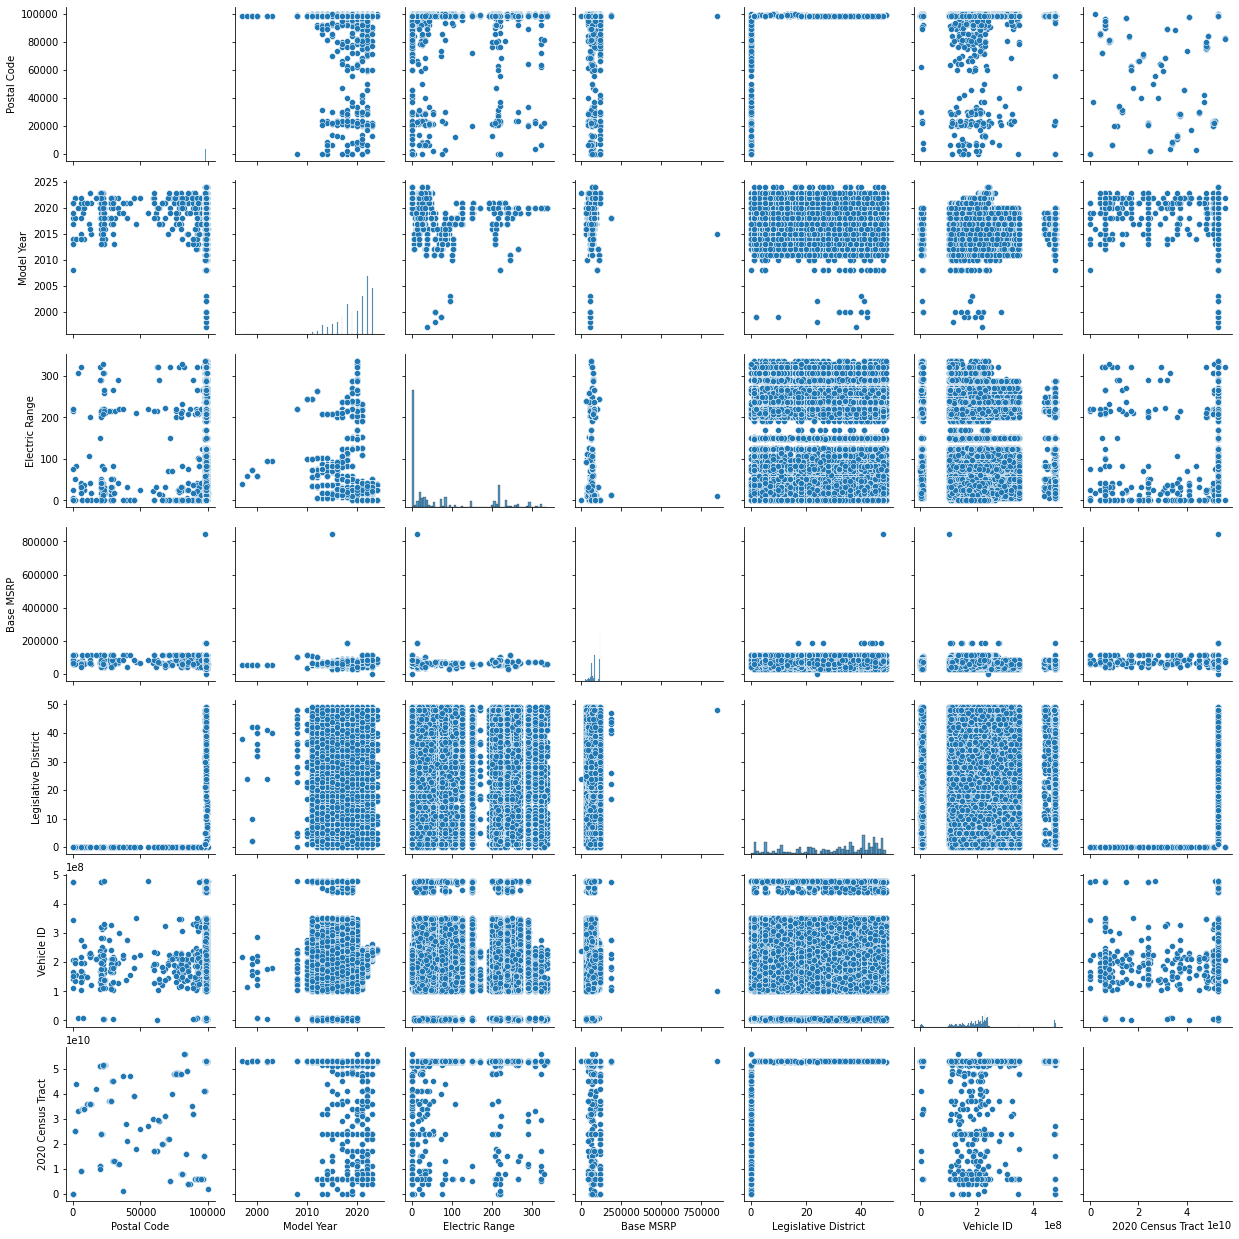

In [40]:
#_understanding relationships which consist in the datasets
sns.pairplot(data2)
plt.show()

In [18]:
#_creating seperated clean columns

In [19]:
make=data2['Make']
print(make)

0          CHEVROLET
1             TOYOTA
2              HONDA
3            HYUNDAI
4             NISSAN
             ...    
135033        TOYOTA
135034         TESLA
135035        RIVIAN
135036    VOLKSWAGEN
135037      CHRYSLER
Name: Make, Length: 135038, dtype: object


In [20]:
make.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
135033     True
135034     True
135035     True
135036     True
135037     True
Name: Make, Length: 135038, dtype: bool

In [21]:
make_new=make.drop_duplicates()

In [22]:
print(make_new)

0                   CHEVROLET
1                      TOYOTA
2                       HONDA
3                     HYUNDAI
4                      NISSAN
5                        JEEP
6               MERCEDES-BENZ
8                       TESLA
18                       FORD
32                 VOLKSWAGEN
35                   CHRYSLER
39                        BMW
43                       AUDI
52                     JAGUAR
53                      VOLVO
59                   POLESTAR
79                       MINI
84                        KIA
92                    LINCOLN
103                    RIVIAN
148                MITSUBISHI
326                     SMART
437                      FIAT
597                   PORSCHE
937                    SUBARU
1323                  GENESIS
1424                    LUCID
2298                    LEXUS
3259           AZURE DYNAMICS
3317               LAND ROVER
3756                   FISKER
4514                 CADILLAC
5412                    MAZDA
7083     W

In [23]:
make_new.shape

(36,)

In [24]:
#Their are 36 different makes of vehicles 

In [25]:
city=data2['City']
print(city)

0                Tacoma
1         Port Townsend
2                Vashon
3            Ridgefield
4             Bremerton
              ...      
135033     Port Angeles
135034          Seattle
135035           Renton
135036       Bellingham
135037          Seattle
Name: City, Length: 135038, dtype: object


In [26]:
city.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
135033     True
135034     True
135035     True
135036     True
135037     True
Name: City, Length: 135038, dtype: bool

In [27]:
city_new=city.drop_duplicates()
print(city_new)

0                Tacoma
1         Port Townsend
2                Vashon
3            Ridgefield
4             Bremerton
              ...      
131765        Fruitland
132925         McCleary
133224    Mechanicsburg
133452          Benicia
134773        Pittsburg
Name: City, Length: 652, dtype: object


In [28]:
city_new.shape

(652,)

In [29]:
#Their are 652 different cities

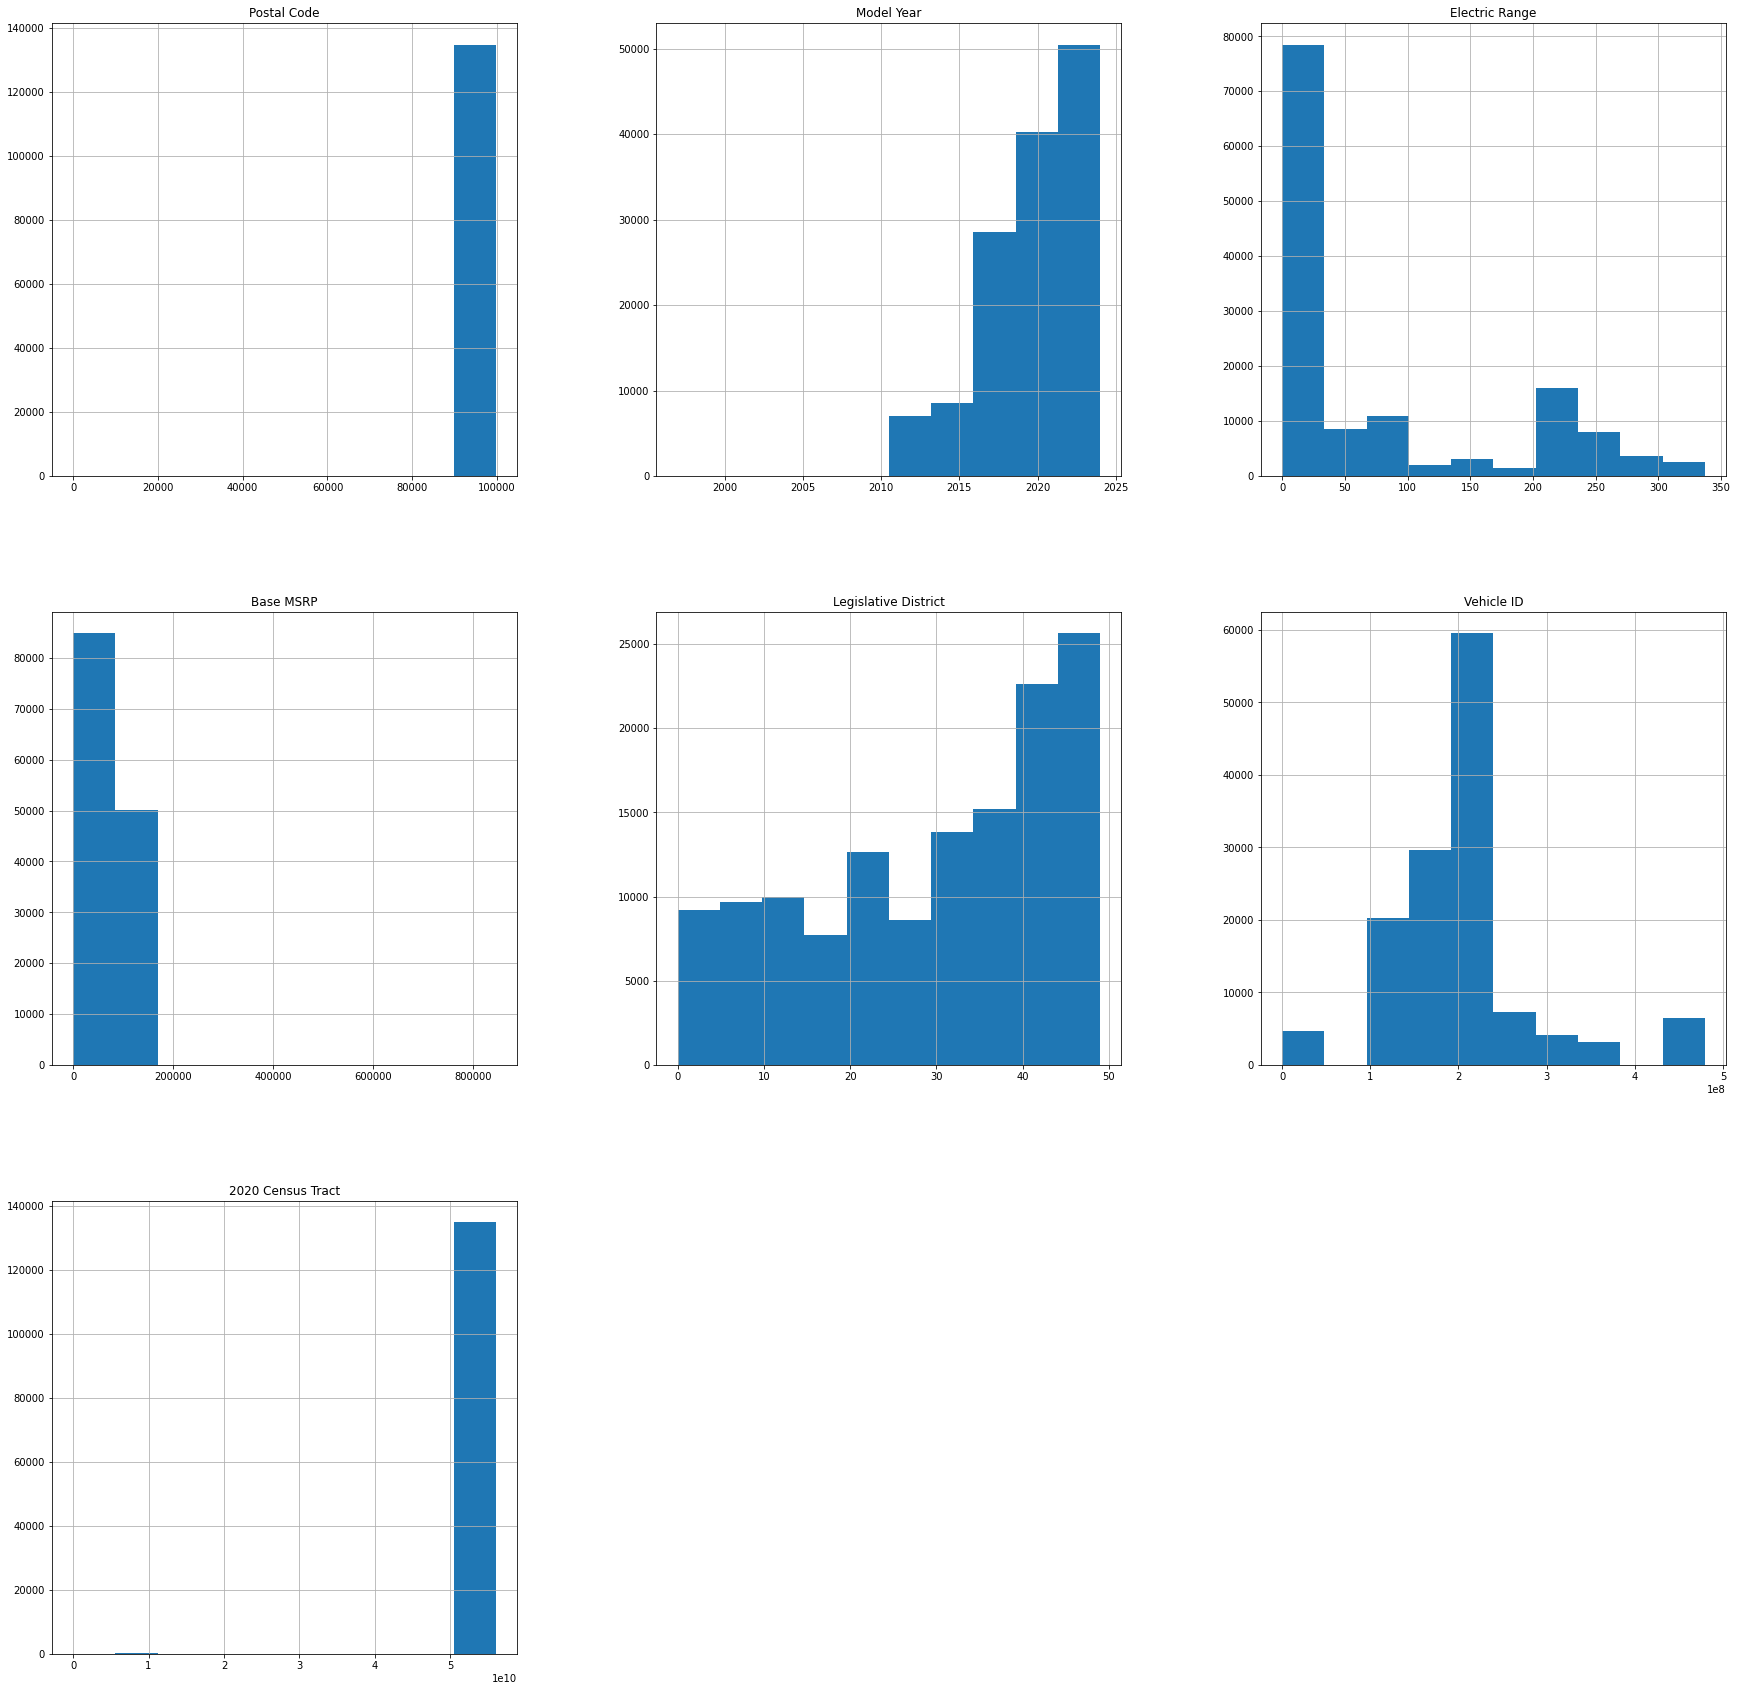

In [30]:
#_distribution of numerical features
data2.hist(figsize=(30, 30))
plt.show()

In [31]:
#_correlation
corr_matrix=data2.corr()
print(corr_matrix)

                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.002923       -0.001981  -0.009324   
Model Year              -0.002923    1.000000       -0.388955   0.534410   
Electric Range          -0.001981   -0.388955        1.000000  -0.405735   
Base MSRP               -0.009324    0.534410       -0.405735   1.000000   
Legislative District     0.023178   -0.007412        0.027899   0.032150   
Vehicle ID               0.004415    0.005914       -0.024348   0.015097   
2020 Census Tract        0.526699    0.004803       -0.000978  -0.000030   

                      Legislative District  Vehicle ID  2020 Census Tract  
Postal Code                       0.023178    0.004415           0.526699  
Model Year                       -0.007412    0.005914           0.004803  
Electric Range                    0.027899   -0.024348          -0.000978  
Base MSRP                         0.032150    0.015097          -0.000030  
Legislative

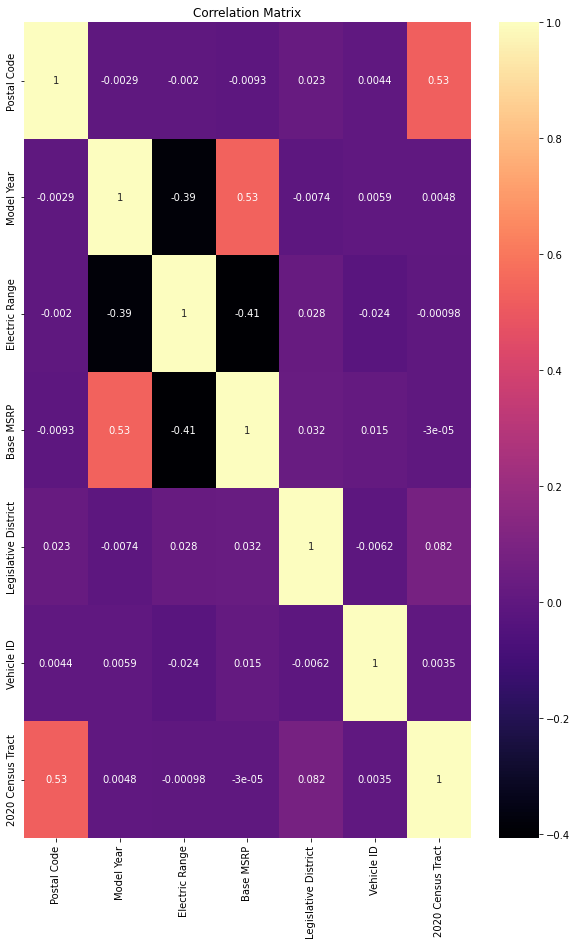

In [32]:
#_correlation matrix heatmap
plt.figure(figsize=(10,15))
sns.heatmap(corr_matrix, annot=True, cmap= 'magma')
plt.title('Correlation Matrix')
plt.show()

In [33]:
#_group by 'City' and 'Make', and include a count column
grouped_data = data2.groupby(['City', 'Make']).size().reset_index(name='Count')

#_sort the data by 'City' and 'Count' in descending order
sorted_data = grouped_data.sort_values(by=['City', 'Count'], ascending=[True, False])

#_reset the index of the DataFrame for a clean representation
sorted_data.reset_index(drop=True, inplace=True)

#_display the resulting DataFrame
print(sorted_data)

          City        Make  Count
0          0.0       TESLA      5
1          0.0      TOYOTA      2
2          0.0      NISSAN      1
3     Aberdeen       TESLA     32
4     Aberdeen   CHEVROLET     16
...        ...         ...    ...
5224    Zillah   CHEVROLET      1
5225    Zillah      JAGUAR      1
5226    Zillah        JEEP      1
5227    Zillah      RIVIAN      1
5228    Zillah  VOLKSWAGEN      1

[5229 rows x 3 columns]


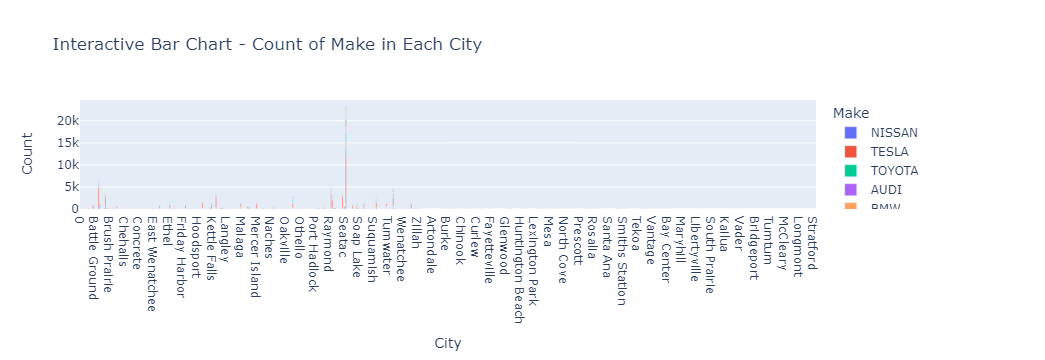

In [34]:
#_interactive chart
fig = px.bar(grouped_data,
             x='City', 
             y='Count',
             color='Make',
             title='Interactive Bar Chart - Count of Make in Each City')
fig.show()

### ENSURE TO ADJUST VIEW OF GRAPH TO GET ACCURATE FIGURES>USE THE CURSOR TO HOVER AROUND POINTS ON GRAPH TO DISPLAY INFORMATION SPECIFICALLY ###

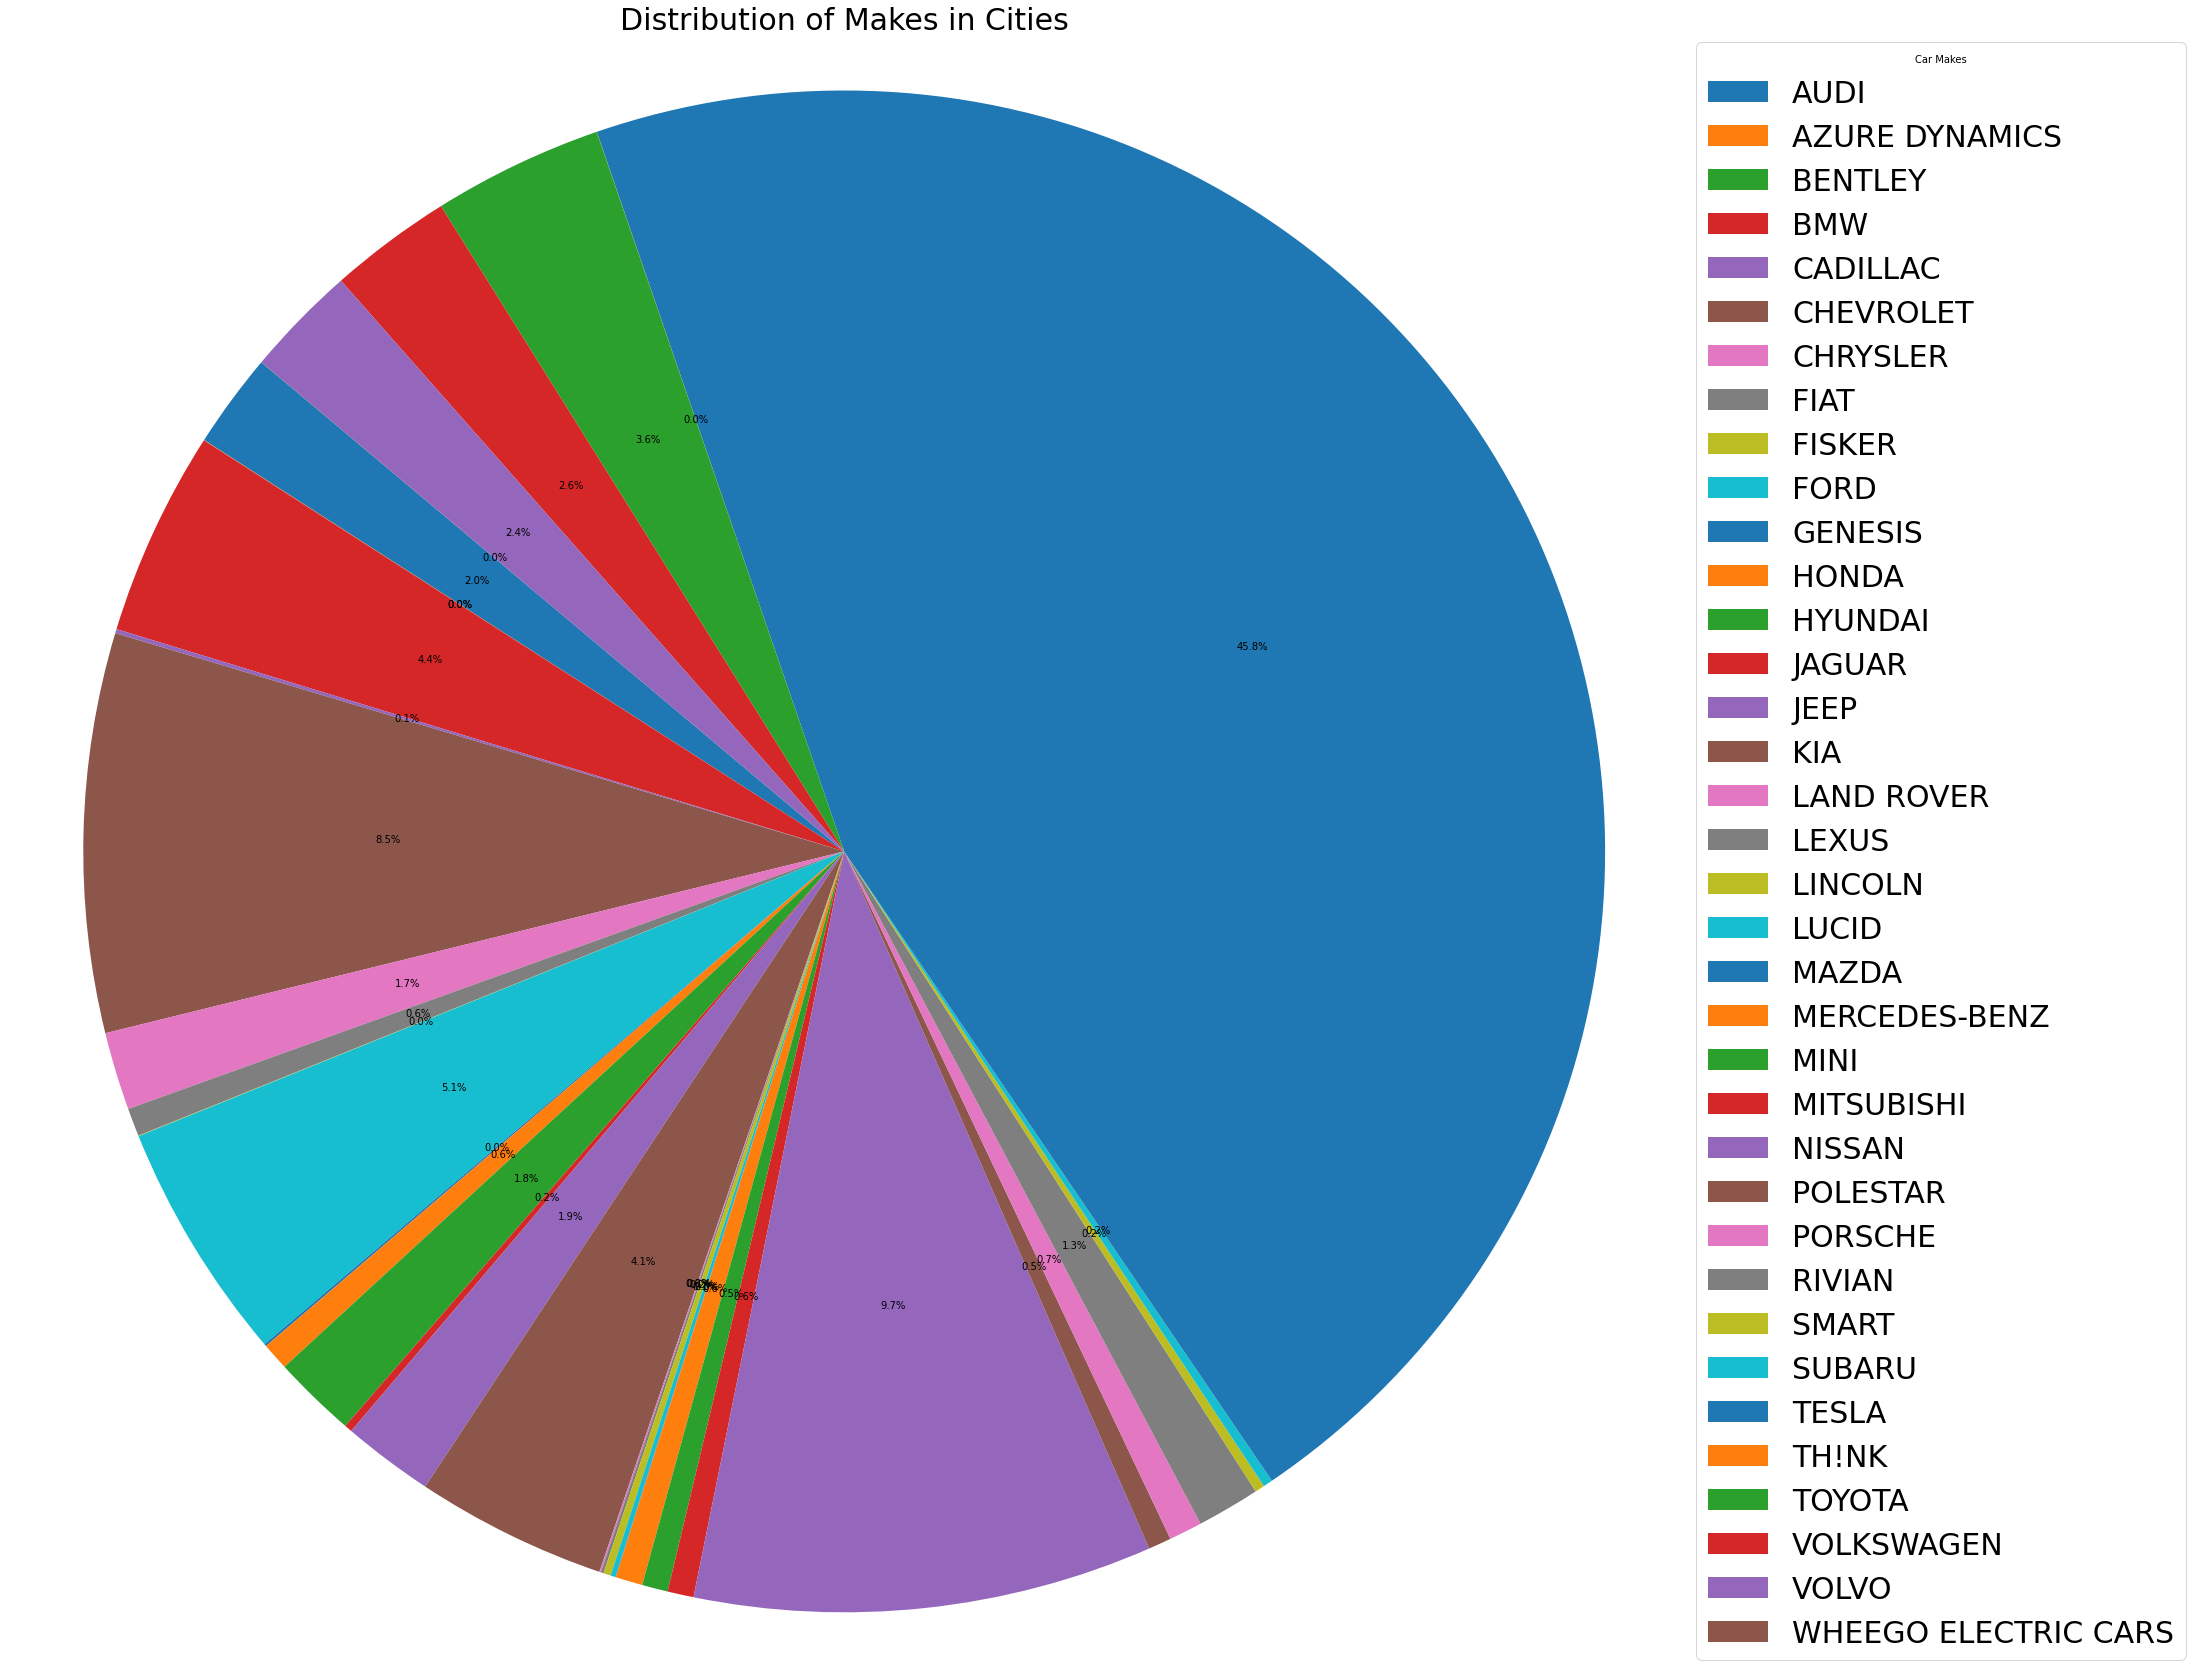

In [35]:
#_create a pie chart displaying the distribution of makes in cities

make_counts = sorted_data.groupby('Make')['Count'].sum()

plt.figure(figsize=(30,30))
plt.pie(make_counts, labels=None, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10}) 
plt.title('Distribution of Makes in Cities', fontsize=30)  
plt.axis('equal')

plt.legend(make_counts.index, title="Car Makes", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=30)

plt.show()
### DOUBLE TAP ON THE GRAPH TO VIEW APPROPRIATE FIGURES ###

Text(0.5, 1.0, 'Histogram for vehicle count')

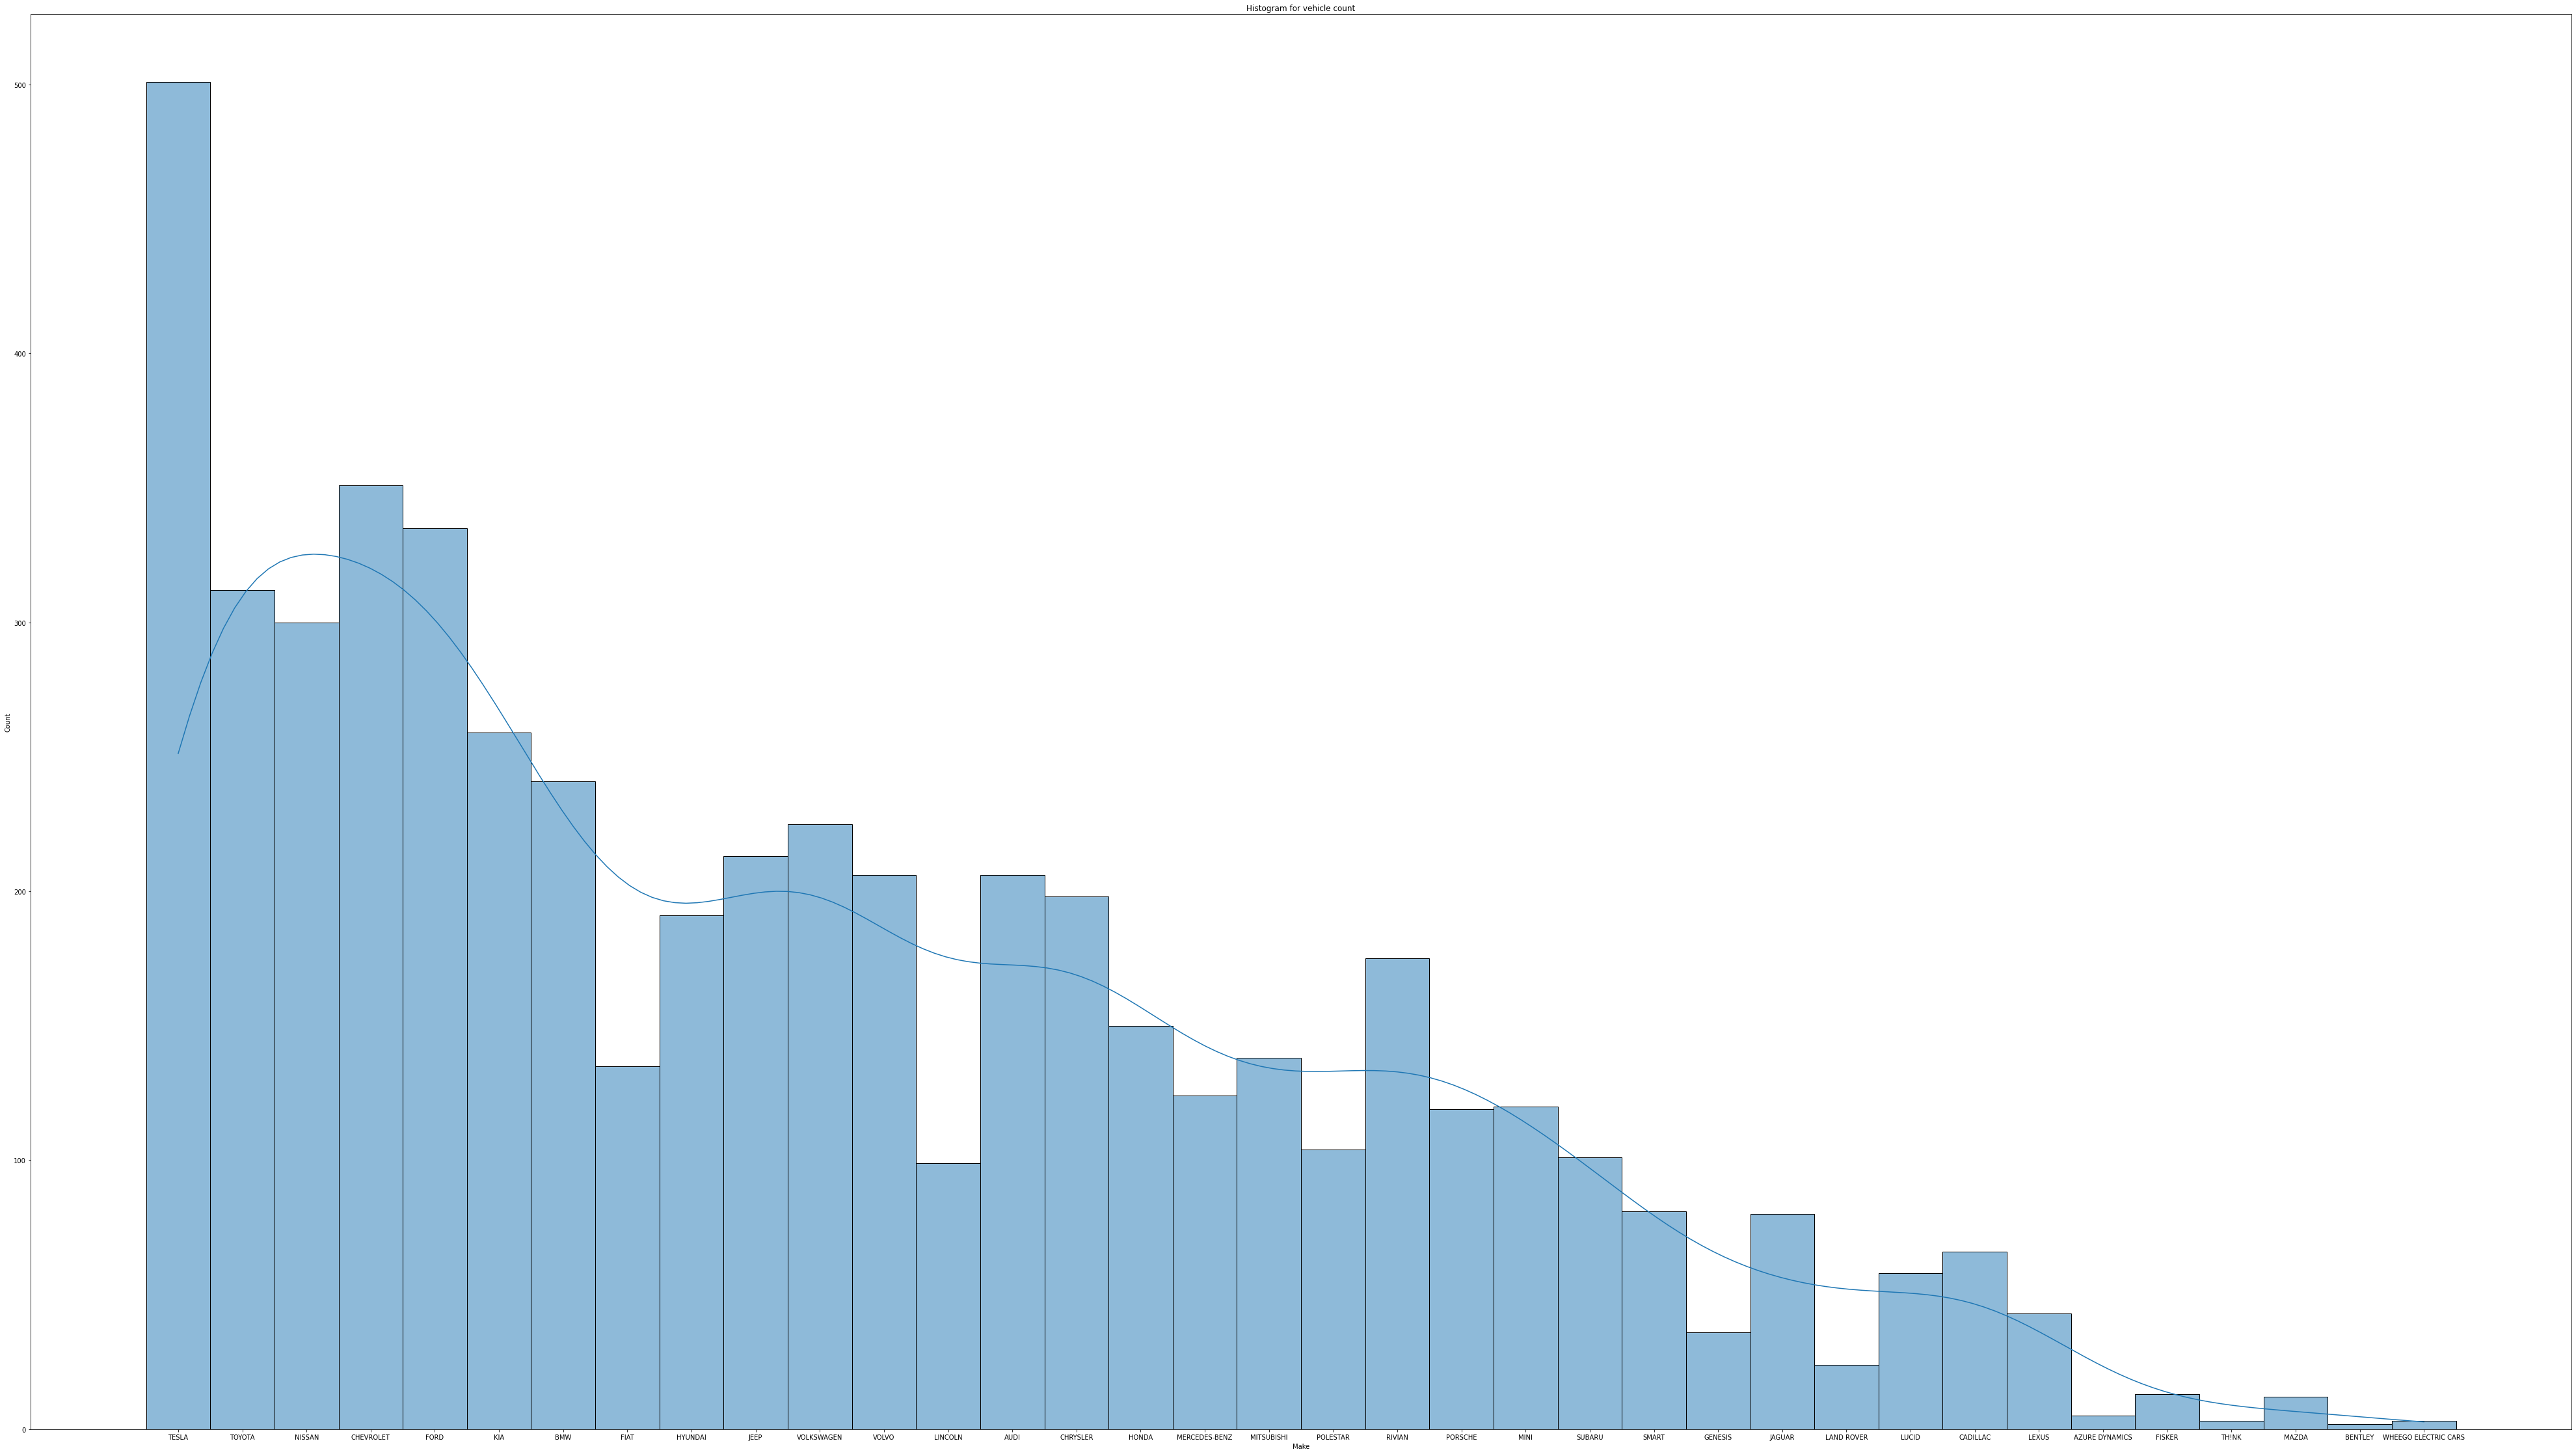

In [36]:
# Visualize data using a histogram
plt.figure(figsize=(70, 40))
sns.histplot(sorted_data['Make'], bins=20, kde=True)
plt.title('Histogram for vehicle count')

In [37]:
# Shapiro-Wilk Test
stat_shapiro, p_value_shapiro = shapiro(grouped_data['Count'])
print(f'Shapiro-Wilk Test: p-value = {p_value_shapiro}')
if p_value_shapiro > 0.05:
    print('The data appears to be normally distributed according to Shapiro-Wilk test.')
else:
    print('The data does not appear to be normally distributed according to Shapiro-Wilk test.')



Shapiro-Wilk Test: p-value = 0.0
The data does not appear to be normally distributed according to Shapiro-Wilk test.


In [38]:
# Anderson-Darling Test
result_anderson = anderson(sorted_data['Count'])
print(f'Anderson-Darling Test: Statistic = {result_anderson.statistic}, '
      f'Critical Values = {result_anderson.critical_values}')
if result_anderson.statistic < result_anderson.critical_values[2]:
    print('The data appears to be normally distributed according to Anderson-Darling test.')
else:
    print('The data does not appear to be normally distributed according to Anderson-Darling test.')


Anderson-Darling Test: Statistic = 1598.440019819007, Critical Values = [0.576 0.655 0.786 0.917 1.091]
The data does not appear to be normally distributed according to Anderson-Darling test.
